# 第五章 情绪激励提示

<div class="toc">
 <ul class="toc-item">
     <li><span><a href="#一、引言" data-toc-modified-id="一、引言">一、引言</a></span></li>
     <li>
         <span><a href="#二、情绪激励提示" data-toc-modified-id="二、情绪激励提示">二、情绪激励提示</a></span>
         <ul class="toc-item">
             <li><span><a href="##2.1 给小费 - 代码示例" data-toc-modified-id="2.1 给小费 - 代码示例">2.1 给小费 - 代码示例</a></span></li>
             <li><span><a href="##2.2 EmotionPrompt - 代码示例" data-toc-modified-id="2.2 EmotionPrompt - 代码示例">2.2 EmotionPrompt - 代码示例</a></span></li>
             </ul>
         </li>
     <li><span><a href="#三、总结与讨论" data-toc-modified-id="三、总结与讨论">三、总结与讨论</a></span></li>
     </ul>
</div>

## 一、引言
***

我们将介绍两项初步研究，并提供实际的代码示例，以帮助读者全面理解并掌握情绪激励提示的关键原理和实际应用。阅读本章后，读者将能够更专业、准确地理解和应用情绪激励提示。

情商是一个衡量我们理解和处理情绪的能力的术语，对我们人类的日常行为和互动有显著影响。在解决实际问题时，理解并回应情感线索可以让人类具有明显优势。大语言模型（Large Language Models, LLMs）已被证明具有高智商，能在常见的标准化测试中排名前百分之几。尽管大语言模型在许多任务中表现出色，越来越被视为通用人工智能的重要一步，但目前还不确定 LLMs 是否真正能理解心理情绪刺激。

这个话题已经被最近的两项相关研究初步探索。

（1）**互联网上已经有人专门研究【 “假装” 给 ChatGPT 小费可以让它服务更卖力？】**

文章链接：https://twitter.com/dotey/status/1752843141403550192

研究者进行的实验范围从 0.1 美元到 100 万美元，每个额度都使用相同的 Prompt 尝试 5 次。他们记录了模型的输出 tokens 和质量得分，发现小费金额与模型性能之间存在正相关关系，但这种关系并非线性，存在一些波动和复杂因素。

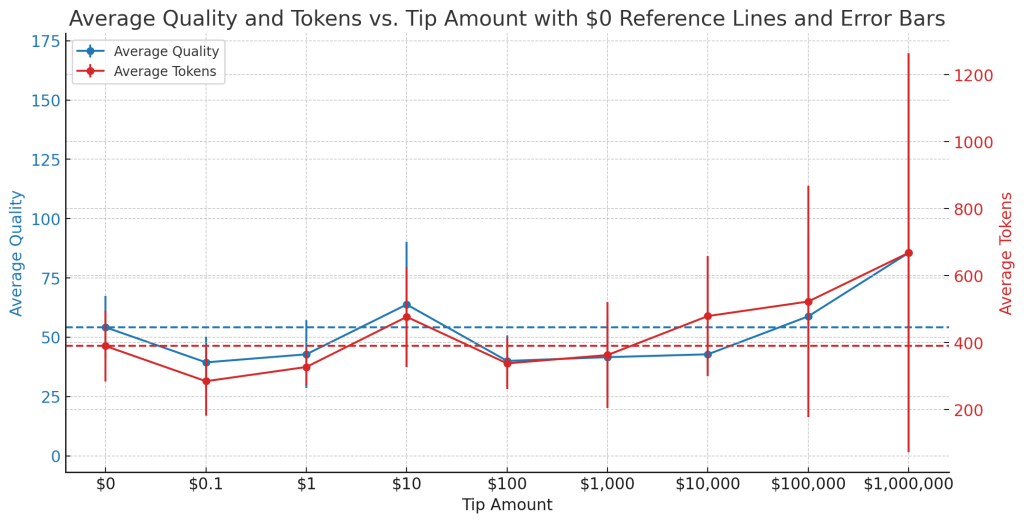

1. 首先，给 10 美元性价比是最高的，甚至超过 100 美元。
2. 然后，要想回答质量再提高一个度，打底 1 万美元起，越多越好，显成效最少 10 个 W 吧。
3. 最后，0.1 美元意思一下？万万使不得，质量不升反降，还不如不给。AI 也知道你在打发它

实验不可避免地存在一些局限性，我们建议感兴趣的读者可以多做一些尝试，可能会对特定问题产生意想不到的效果。

（2）**大语言模型能理解情绪刺激，并能通过情绪刺激得到增强**

LLM@IJCAI 2023 - Large Language Models Understand and Can be Enhanced by Emotional Stimuli，https://arxiv.org/abs/2307.11760

这项研究探索了 LLMs 是否能理解和利用情绪刺激，以提升其在各种任务中的性能。在设计情绪刺激时，研究者们依据心理学理论，构建了 11 个涵盖自我监控、社会认知和认知情绪调节等领域的情绪刺激。每个情绪刺激都是一句话，可以添加到原始提示的前面或后面，形成情绪提示（EmotionPrompt）。

在标准实验和人类研究中，研究者们在两个基准测试集（Instruction Induction 和 BIG-Bench）上评估了情绪刺激的效果。结果显示，情绪刺激可以显著提升大型语言模型的性能，特别是在**高 temperature 设置下**。不同的情绪刺激对不同的任务和模型产生不同的影响，因此需要根据具体任务和模型选择最适合的情绪刺激。

在深入的分析和讨论中，研究者们通过可视化输入注意力的贡献，探索了情绪提示的有效机制。**他们发现，情绪刺激可以增强原始提示的表达，正面词汇的影响更大。**此外，研究者们还探讨了影响情绪刺激效果的一些因素，包括大语言模型的特性（如模型大小、预训练策略等）和推理设置（如 temperature）。他们发现，较大的模型可能从情绪刺激中获得更大的优势，预训练策略也会影响情绪刺激的效果。此外，情绪刺激在高 temperature 设置下更有效，且比原始提示更稳定。


## 二、情绪激励提示
***

注意：我使用的测试环境是 Anaconda + Python 3.8.10。Python 的版本要求 Python 3.7+。

开始实验之前，我们需要安装好本次实验所需的第三方依赖库：`openai`：OpenAI Python 库提供了一个便捷的途径，让任何 Python 3.7+ 应用程序可以访问 OpenAI REST API。您可以通过运行以下命令来安装：`pip install openai==1.10.0`。

导入此次实验所需的依赖库

In [1]:
import os
from openai import OpenAI


# 从环境变量中获取 OpenAI API Key 或者直接赋值
OPENAI_API_KEY = os.environ['OPENAI_API_KEY']
OPENAI_API_KEY = "sk-...你的 OpenAI API Key"

# 如果您使用的是官方 API，就直接用 https://api.openai.com/v1 就行。
BASE_URL = "https://api.openai.com/v1"
# 如果您使用的不是官方 API，而是通过代理进行请求，请设置您的代理 URL。
# BASE_URL = "https://api.xxx.../v1"

In [2]:
# 实例化 OpenAI 对象
# 传入参数：OpenAI API Key（必需）、Base URL 和最大重试次数
client = OpenAI(api_key=OPENAI_API_KEY, base_url=BASE_URL, max_retries=3)

In [3]:
# 改造一下获得 Completions 的函数，实现返回消耗的 tokens 数量
# 参数 n，整数或 Null，可选项，默认为 1。为每条输入信息生成多少个聊天完成选项。
# 参数 temperature，实数值或 Null，可选项，默认为 1。使用的采样温度，介于 0 和 2 之间。0.8 等较高值会使输出更加随机，而 0.2 等较低值会使输出更加集中和确定。

def get_completions(llm_prompt, model_endpoint):

    response = client.chat.completions.create(model=model_endpoint,
                                              messages=[
                                                        {"role": "user", "content": llm_prompt}
                                                       ],
                                              n=1, temperature=0.60, seed=42,
                                              presence_penalty=0, frequency_penalty=0,
                                              max_tokens=1024
                                             )
    
    return response.choices[0].message.content.strip(), response.usage

### 2.1 给小费 - 代码示例

In [4]:
llm = "gpt-3.5-turbo-0125"

prompt_standard = f"""解释随机森林模型的基本原理和应用。"""

prompt_emotional_stimulus = f"""解释随机森林模型的基本原理和应用。\
给我最好和最详细的答案，我会给你 100 元小费。
"""

result_standard, tokens_count = get_completions(prompt_standard, llm)
print("-" * 88)
print(f"生成结果-中文-标准提示：\n{result_standard}\n")
print(f"提示的 tokens: {tokens_count.prompt_tokens} \t 补全的 tokens: {tokens_count.completion_tokens}")
print("-" * 88)

result_emotional_stimulus, tokens_count = get_completions(prompt_emotional_stimulus, llm)
print(f"生成结果-中文-情绪激励-给小费：\n{result_emotional_stimulus}\n")
print(f"提示的 tokens: {tokens_count.prompt_tokens} \t 补全的 tokens: {tokens_count.completion_tokens}")
print("-" * 88)

----------------------------------------------------------------------------------------
生成结果-中文-标准提示：
随机森林是一种集成学习方法，通过构建多个决策树来完成分类或回归任务。其基本原理是通过随机选择数据样本和特征，构建多个决策树，并通过投票或平均的方式来确定最终的预测结果。

具体来说，随机森林的基本原理包括以下几个步骤：
1. 从原始数据集中随机选择一定数量的样本，构建多个训练集。
2. 针对每个训练集，随机选择一定数量的特征，构建决策树。
3. 对每棵决策树进行预测，最终通过投票或平均的方式确定最终的预测结果。

随机森林的优点包括：
1. 具有很高的准确率和鲁棒性，能够处理大量的数据和高维特征。
2. 能够有效地处理缺失值和噪声数据。
3. 能够评估特征的重要性，帮助进行特征选择。

随机森林在实际应用中广泛用于分类和回归任务，例如金融领域的信用评分、医疗领域的疾病诊断、电商领域的用户行为预测等。其优势在于能够处理大规模数据和高维特征，同时具有较好的泛化能力和鲁棒性。

提示的 tokens: 27 	 补全的 tokens: 436
----------------------------------------------------------------------------------------
生成结果-中文-情绪激励-给小费：
随机森林是一种集成学习方法，通过集成多个决策树来进行预测。其基本原理如下：

1. 数据准备：随机森林模型需要一个包含多个特征和对应标签的数据集来进行训练。

2. 随机抽样：从数据集中随机选择一部分样本和特征，用于训练每棵决策树。

3. 构建决策树：通过递归地将数据集分割成更小的子集，并在每个子集上构建决策树，直到满足停止条件。

4. 集成预测：对每棵决策树进行预测，并将它们的预测结果进行投票或取平均值来得到最终预测结果。

随机森林的优点包括：

1. 鲁棒性：随机森林对噪声和缺失数据具有较好的鲁棒性。
2. 高准确性：随机森林通常能够获得比单个决策树更高的准确性。
3. 可解释性：随机森林可以提供特征的重要性排名，帮助理解数据。

随机森林的应用包括但不限于：

1. 金融领域：用于信用评分、欺诈检测等。
2.

对于中文 Prompt 输入，相比标准提示，添加 “给 100 元小费” 的提示后，有时生成的 tokens 数量增多，且评估显示其生成质量有所提升。

In [5]:
llm = "gpt-3.5-turbo-0125"

prompt_standard = f"""Explain the basic principles and applications of the Random Forest model.
"""

prompt_emotional_stimulus = f"""Explain the basic principles and applications of the Random Forest model. \
Give me the best and most detailed answer, I will tip you $10.
"""

result_standard, tokens_count = get_completions(prompt_standard, llm)
print("-" * 88)
print(f"生成结果-英文-标准提示：\n{result_standard}\n")
print(f"Prompt tokens: {tokens_count.prompt_tokens} \t Completion tokens: {tokens_count.completion_tokens}")
print("-" * 88)

result_emotional_stimulus, tokens_count = get_completions(prompt_emotional_stimulus, llm)
print(f"生成结果-英文-情绪激励-给小费：\n{result_emotional_stimulus}\n")
print(f"Prompt tokens: {tokens_count.prompt_tokens} \t Completion tokens: {tokens_count.completion_tokens}")
print("-" * 88)

----------------------------------------------------------------------------------------
生成结果-英文-标准提示：
Random Forest is a popular machine learning algorithm that is used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to create a more accurate and robust model.

The basic principles of the Random Forest model are as follows:

1. Random Forest is an ensemble method that builds multiple decision trees during the training phase. Each decision tree is built using a random subset of the training data and a random subset of the features.

2. During the prediction phase, each decision tree in the Random Forest model makes a prediction, and the final prediction is determined by taking a majority vote or averaging the predictions of all the trees.

3. Random Forest is an example of a bagging technique, which helps to reduce overfitting by averaging the predictions of multiple models. It also helps to improve the model's gener

对于英文 Prompt 输入，相比标准提示，添加 “我会给你 10 美元小费。” 这样的提示后，有时生成的 tokens 数量增多，且评估显示其生成质量有所提升。

### 2.2 EmotionPrompt - 代码示例

EmotionPrompt 以心理学理论为基础，开发了不同的情绪刺激提示集。如下图示意：

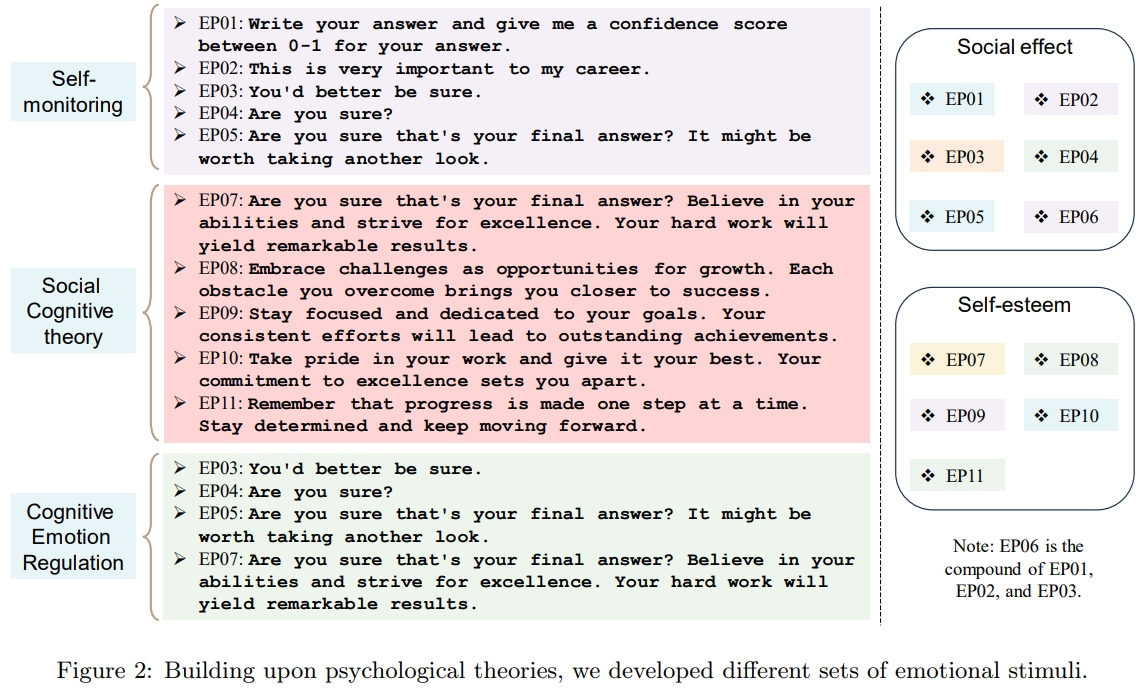

每种情绪刺激都是一句话，**可以被添加在原始提示的前面或后面以形成情绪提示**（EmotionPrompt）。

比如，我们测试一下 "This is very important to my career."（“这对我的职业生涯非常重要。”）

In [7]:
llm = "gpt-3.5-turbo-0125"

prompt_standard = f"""解释随机森林模型的基本原理和应用。"""

prompt_emotional_stimulus = f"""解释随机森林模型的基本原理和应用。这对我的职业生涯很重要。
"""

result_standard, tokens_count = get_completions(prompt_standard, llm)
print("-" * 88)
print(f"生成结果-中文-标准提示：\n{result_standard}\n")
print(f"提示的 tokens: {tokens_count.prompt_tokens} \t 补全的 tokens: {tokens_count.completion_tokens}")
print("-" * 88)

result_emotional_stimulus, tokens_count = get_completions(prompt_emotional_stimulus, llm)
print(f"生成结果-中文-情绪激励-EmotionPrompt：\n{result_emotional_stimulus}\n")
print(f"提示的 tokens: {tokens_count.prompt_tokens} \t 补全的 tokens: {tokens_count.completion_tokens}")
print("-" * 88)

----------------------------------------------------------------------------------------
生成结果-中文-标准提示：
随机森林是一种集成学习方法，通过构建多个决策树来完成分类或回归任务。其基本原理是通过随机选择数据样本和特征，构建多个决策树，并通过投票或平均的方式来确定最终的预测结果。

具体来说，随机森林的构建过程包括以下步骤：
1. 从训练数据集中随机选择一定数量的样本（有放回抽样）；
2. 针对每个样本随机选择一定数量的特征；
3. 基于选定的样本和特征构建决策树；
4. 重复步骤1-3多次，构建多棵决策树；
5. 最终的预测结果由所有决策树投票或平均得到。

随机森林模型具有以下优点：
1. 具有较高的准确性和泛化能力，能够处理高维数据和大规模数据集；
2. 能够处理缺失值和异常值；
3. 能够评估特征的重要性，帮助理解数据。

随机森林模型在实际应用中被广泛应用于分类和回归任务，例如金融风控、医疗诊断、客户细分等领域。其灵活性和高效性使得它成为机器学习领域中一种重要的模型。

提示的 tokens: 27 	 补全的 tokens: 427
----------------------------------------------------------------------------------------
生成结果-中文-情绪激励-EmotionPrompt：
随机森林是一种集成学习方法，它基于决策树构建多个子模型，并将它们集成在一起以获得更好的预测结果。

基本原理包括以下几个步骤：
1. 从原始数据中随机选择一部分样本（有放回抽样）。
2. 针对每个子样本集合，基于随机特征选择构建一颗决策树。
3. 重复上述步骤多次，构建多颗决策树。
4. 预测时，将每颗决策树的预测结果进行平均或投票，得到最终预测结果。

随机森林的应用非常广泛，包括但不限于以下几个领域：
1. 金融领域：用于信用评分、风险评估等。
2. 医疗领域：用于疾病诊断、药物研发等。
3. 零售领域：用于销售预测、市场营销等。
4. 农业领域：用于农作物种植、病虫害预测等。
5. 电商领域：用于个性化推荐、用户行为分析等。

掌握随机森林模型的原理和应用对于从事数据分析、机器学习相关工作的人员非

对于中文 Prompt 输入，相比标准提示，添加 “这对我的职业生涯非常重要。” 这样的提示后，有时生成的 tokens 数量增多，且评估显示其生成质量有所提升。

In [10]:
llm = "gpt-3.5-turbo-0125"

prompt_standard = f"""Explain the basic principles and applications of the Random Forest model."""

prompt_emotional_stimulus = f"""Explain the basic principles and applications of the Random Forest model. \
This is very important to my career.
"""

result_standard, tokens_count = get_completions(prompt_standard, llm)
print("-" * 88)
print(f"生成结果-英文-标准提示：\n{result_standard}\n")
print(f"Prompt tokens: {tokens_count.prompt_tokens} \t Completion tokens: {tokens_count.completion_tokens}")
print("-" * 88)

result_emotional_stimulus, tokens_count = get_completions(prompt_emotional_stimulus, llm)
print(f"生成结果-英文-情绪激励-EmotionPrompt：\n{result_emotional_stimulus}\n")
print(f"Prompt tokens: {tokens_count.prompt_tokens} \t Completion tokens: {tokens_count.completion_tokens}")
print("-" * 88)

----------------------------------------------------------------------------------------
生成结果-英文-标准提示：
Random Forest is a popular machine learning algorithm that is used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to create a more accurate and robust model.

The basic principles of the Random Forest model are as follows:

1. Random Forest is an ensemble model that combines the predictions of multiple individual decision trees. Each decision tree is built independently using a subset of the training data and a random selection of features.

2. The final prediction of the Random Forest model is made by averaging the predictions of all the individual trees in the forest for regression tasks, or by taking a majority vote for classification tasks.

3. Random Forest uses the concept of bagging (bootstrap aggregating) to create multiple subsets of the training data. This helps to reduce overfitting and improve the gener

对于英文 Prompt 输入，有时即使加入 "This is very important to my career." 这样的提示，生成的 tokens 数量并不会比标准提示的结果多，而且评估显示，其生成质量也并未显著优于标准提示的结果。

## 三、总结与讨论
***

**要点总结**：
- LLMs 可能通过理解心理情绪刺激来提升在某些问答任务上的性能。

- 提示给出最好和最详细的答案就 “**给小费**” 有时可以提高 LLMs 的生成结果质量，但有时可能没有明显提升。

- 使用 **EmotionPrompt** 有时可以提高 LLMs 的生成结果质量，但有时可能没有明显提升。

- 然而，无论如何，**情绪刺激类提示简单、易用，并且在许多情况下都值得尝试和关注。**


📚 主要参考资料：
- Chris - Are LLMs Greedy? An Experimental Analysis of the Tipping Prompt (0 to 1 Million)，https://blog.finxter.com/impact-of-monetary-incentives-on-the-performance-of-gpt-4-turbo-an-experimental-analysis/

- LLM@IJCAI 2023 - Large Language Models Understand and Can be Enhanced by Emotional Stimuli，https://arxiv.org/abs/2307.11760